# Анализ сервиса вопросов и ответов по программированию

# Описание проекта

С помощью SQL необходимо посчитать ключевые метрики сервис-системы вопросов и ответов о программировани  StackOverflow.

# Описание данных

**ER-диаграмма базы данных**

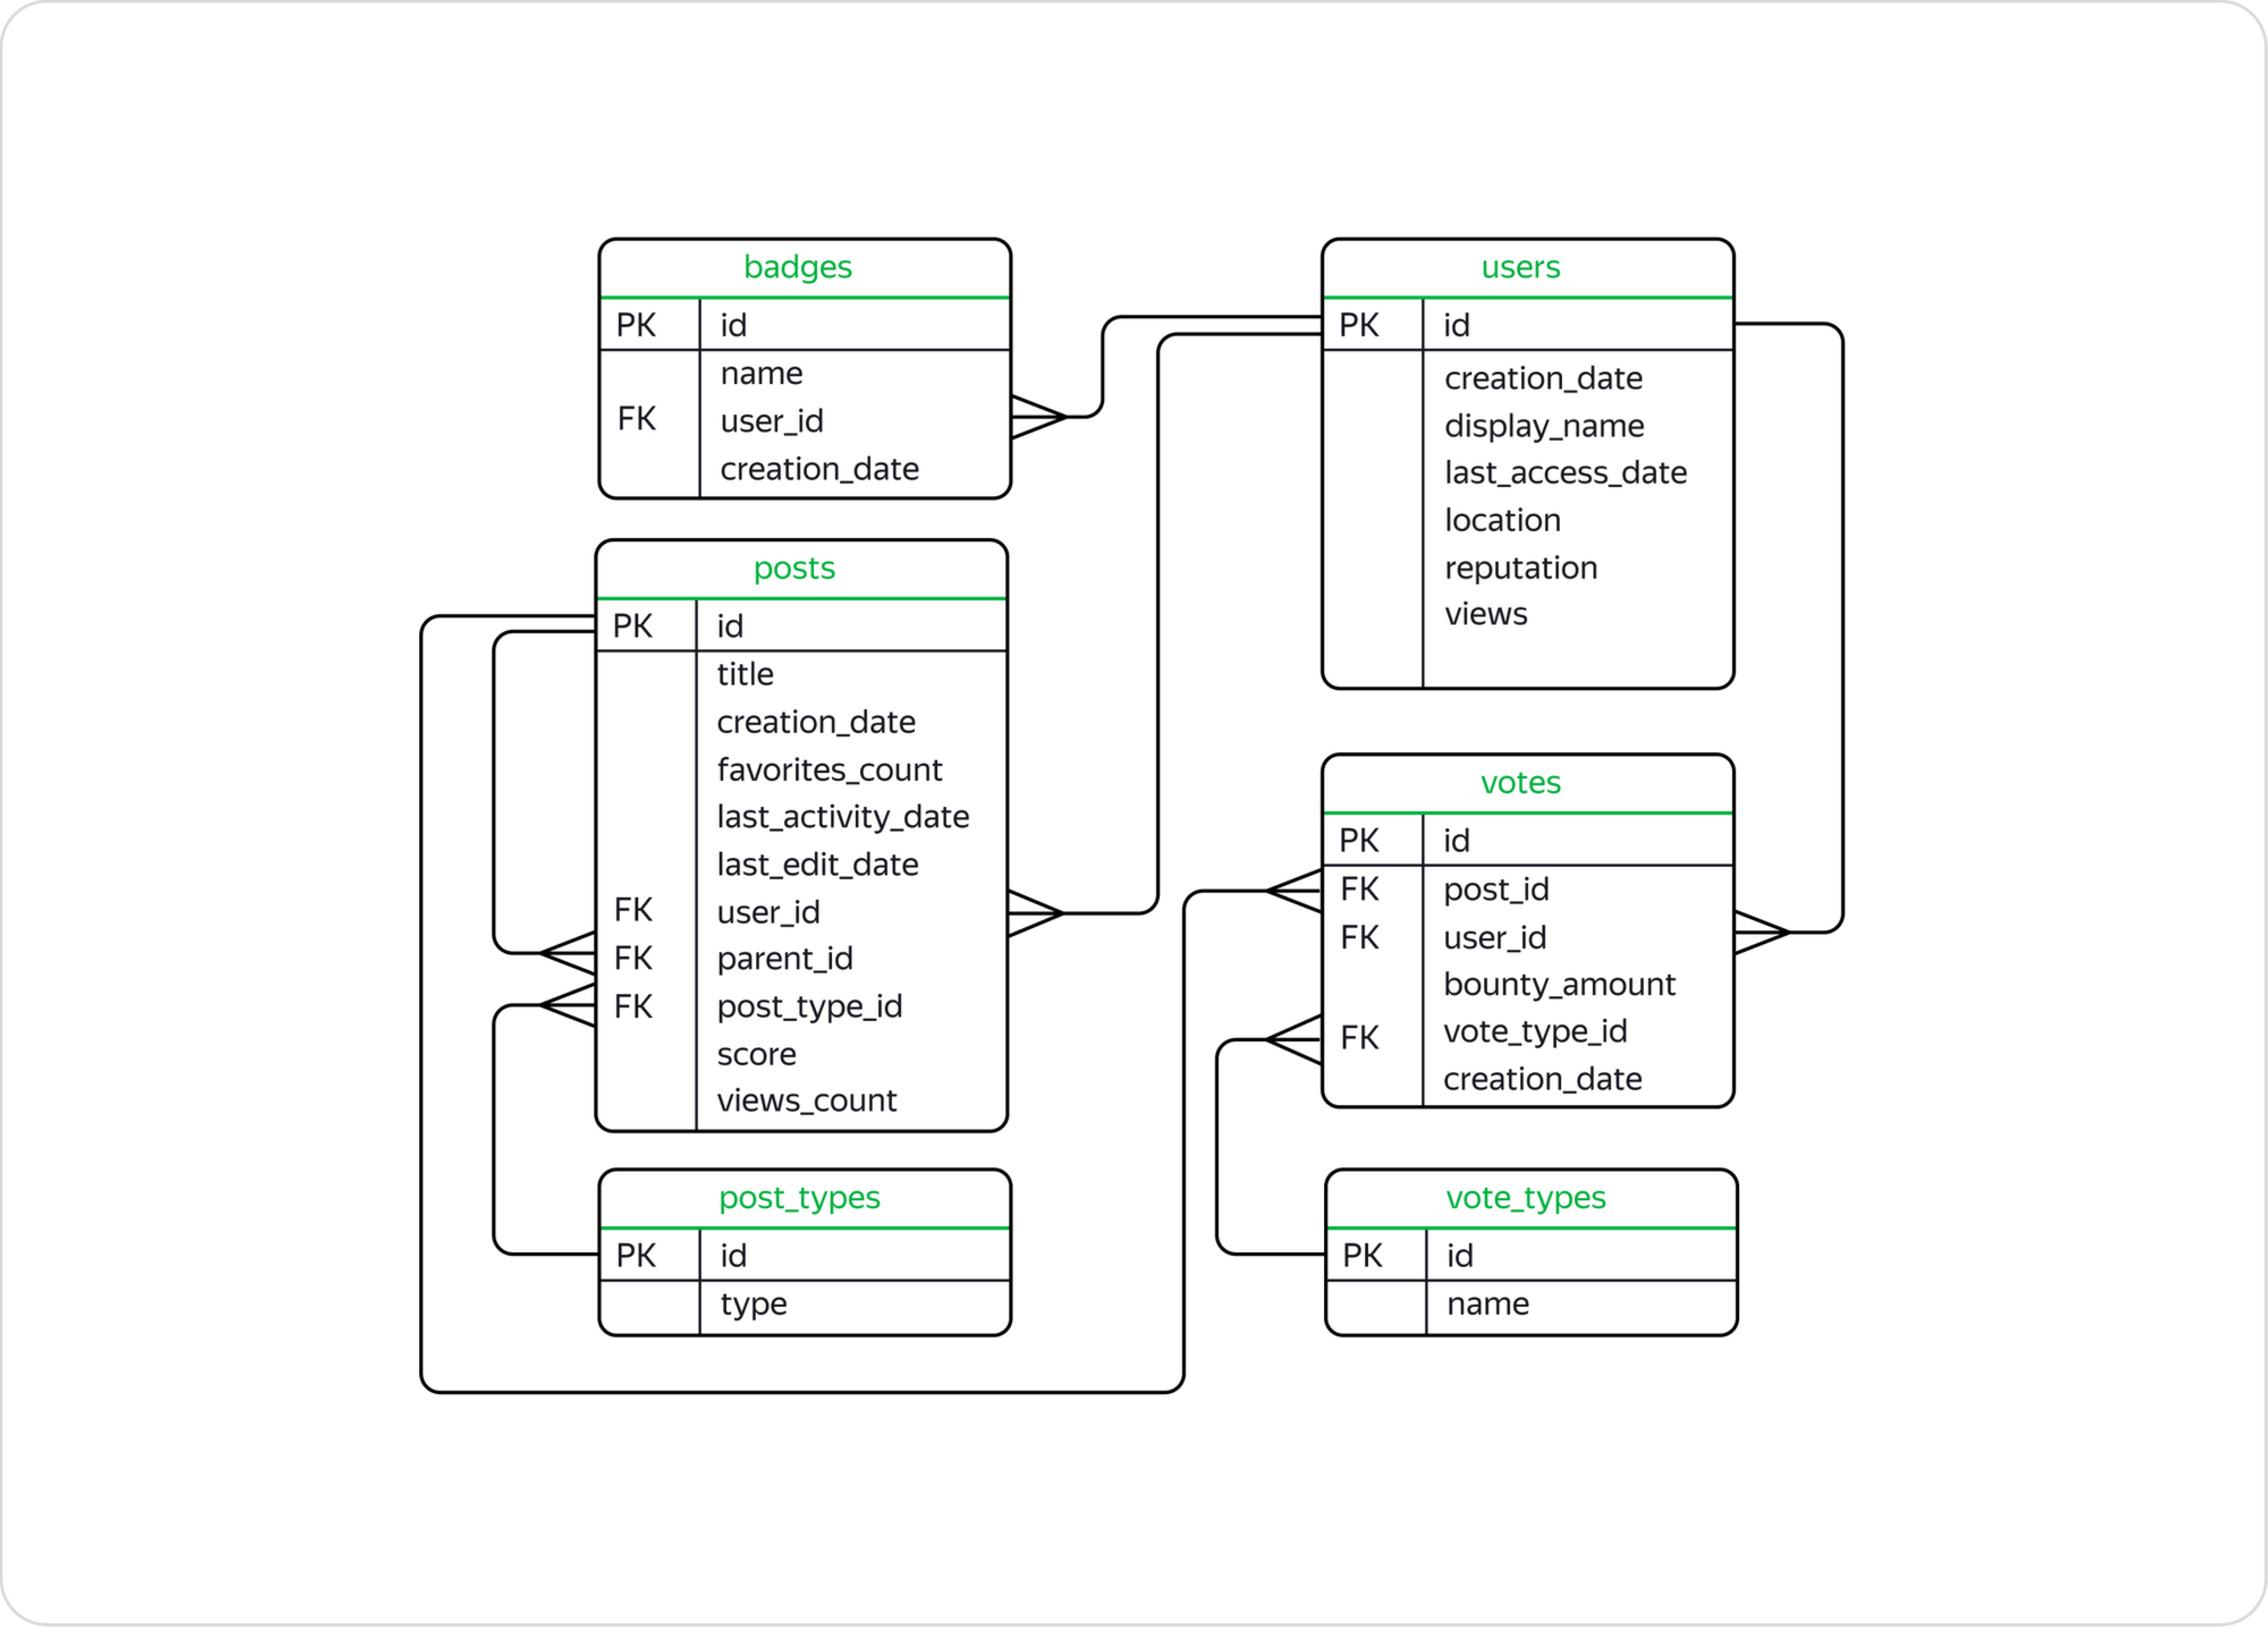

**Таблица stackoverflow.badges**

Хранит информацию о значках, которые присуждаются за разные достижения. Например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок postgresql. 

Поле/Описание:
- id - Идентификатор значка, первичный ключ таблицы
- name - Название значка
- user_id - Идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице users
- creation_date - Дата присвоения значка

**Таблица stackoverflow.post_types**

Содержит информацию о типе постов. Их может быть два: 
- Question — пост с вопросом
- Answer — пост с ответом

Поле/Описание:
- id - Идентификатор типа поста, первичный ключ таблицы
- type - Тип поста

**Таблица stackoverflow.posts**

Содержит информацию о постах.

Поле/Описание:
- id - Идентификатор поста, первичный ключ таблицы
- title - Заголовок поста
- creation_date - Дата создания поста
- favorites_count - Число, которое показывает, сколько раз пост добавили в «Закладки»
- last_activity_date - Дата последнего действия в посте, например комментария
- last_edit_date - Дата последнего изменения поста
- user_id - Идентификатор пользователя, который создал пост, внешний ключ к таблице users
- parent_id	- Если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом
- post_type_id - Идентификатор типа поста, внешний ключ к таблице post_types
- score - Количество очков, которое набрал пост
- views_count - Количество просмотров

**Таблица stackoverflow.users**

Содержит информацию о пользователях.

Поле/Описание:
- id - Идентификатор пользователя, первичный ключ таблицы
- creation_date	- Дата регистрации пользователя
- display_name	- Имя пользователя
- last_access_date - Дата последнего входа
- location - Местоположение
- reputation - Очки репутации, которые получают за хорошие вопросы и полезные ответы
- views - Число просмотров профиля пользователя

**Таблица stackoverflow.vote_types**

Содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту. Типов бывает несколько: 
- UpMod — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными.
- DownMod — такую отметку получают посты, которые показались пользователям наименее полезными.
- Close — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы.
- Offensive — такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста.
- Spam — такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.

Поле/Описание:

- id - Идентификатор типа голоса, первичный ключ
- name - Название метки

**Таблица stackoverflow.votes**

Содержит информацию о голосах за посты. 

Поле/Описание
- id - Идентификатор голоса, первичный ключ
- post_id - Идентификатор поста, внешний ключ к таблице posts
- user_id -	Идентификатор пользователя, который поставил посту голос, внешний ключ к таблице users
- bounty_amount	- Сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту
- vote_type_id	- Идентификатор типа голоса, внешний ключ к таблице vote_types
- creation_date	- Дата назначения голоса

# Часть 1

**Задание 1.**
Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

In [ ]:
'''
SELECT COUNT(id)
FROM stackoverflow.posts
WHERE (score>300 OR favorites_count >=100) AND post_type_id = 1
'''

**Задание 2.** Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлите до целого числа.

In [ ]:
'''
WITH
cnt AS
(SELECT CAST(DATE_TRUNC('day', p.creation_date) AS date) AS date, COUNT(p.id)
FROM stackoverflow.posts p
WHERE post_type_id = 1
GROUP BY CAST(DATE_TRUNC('day', p.creation_date) AS date)
HAVING CAST(DATE_TRUNC('day', p.creation_date) AS date) BETWEEN '2008-11-01' AND '2008-11-18')

SELECT ROUND(AVG(count)) FROM cnt
'''

**Задание 3.** Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей.

In [ ]:
'''
SELECT COUNT(DISTINCT(u.id))
FROM stackoverflow.users u
JOIN stackoverflow.badges b
ON u.id = b.user_id
WHERE CAST(DATE_TRUNC('day', u.creation_date) AS date) = CAST(DATE_TRUNC('day', b.creation_date) AS date)
'''

**Задание 4.** Сколько уникальных постов пользователя с именем Joel Coehoorn получили хотя бы один голос?

In [ ]:
'''
SELECT COUNT(DISTINCT(p.id))
FROM stackoverflow.posts p
JOIN stackoverflow.users u
ON p.user_id = u.id
RIGHT JOIN stackoverflow.votes v
ON p.id = v.post_id
WHERE u.display_name LIKE 'Joel Coehoorn'
'''

**Задание 5.** Выгрузите все поля таблицы vote_types. Добавьте к таблице поле rank, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю id.

In [ ]:
'''
SELECT *, RANK() OVER (ORDER BY id DESC) AS rank
FROM stackoverflow.vote_types
ORDER BY id
'''

**Задание 6.** Отберите 10 пользователей, которые поставили больше всего голосов типа Close. Отобразите таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.

In [ ]:
'''
SELECT v.user_id, COUNT(v.id)
FROM stackoverflow.votes v
WHERE vote_type_id = 6
GROUP BY v.user_id
ORDER BY COUNT(v.id) DESC, v.user_id DESC
LIMIT 10
'''

**Задание 7.** Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно.

Отобразите несколько полей:
- идентификатор пользователя;
- число значков;
- место в рейтинге — чем больше значков, тем выше рейтинг.

Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.
Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.

In [ ]:
'''
SELECT b.user_id, COUNT(b.id), DENSE_RANK() OVER (ORDER BY COUNT(b.id) DESC)
FROM stackoverflow.badges b
WHERE CAST(creation_date AS date) BETWEEN '2008-11-15' AND '2008-12-15'
GROUP BY b.user_id
ORDER BY COUNT(b.id) DESC, b.user_id
LIMIT 10
'''

**Задание 8.** Сколько в среднем очков получает пост каждого пользователя?
Сформируйте таблицу из следующих полей:
- заголовок поста;
- идентификатор пользователя;
- число очков поста;
- среднее число очков пользователя за пост, округлённое до целого числа.

Не учитывайте посты без заголовка, а также те, что набрали ноль очков.

In [ ]:
'''
SELECT p.title, p.user_id, p.score,
ROUND(AVG(p.score) OVER (PARTITION BY p.user_id))
FROM stackoverflow.posts p
WHERE p.score <> 0 AND p.title IS NOT NULL
'''

**Задание 9.** Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.

In [ ]:
'''
SELECT p.title
FROM stackoverflow.posts p
WHERE p.user_id IN
(SELECT user_id FROM stackoverflow.badges GROUP BY user_id HAVING COUNT(id)>1000)
AND p.title IS NOT NULL
'''

**Задание 10.** Напишите запрос, который выгрузит данные о пользователях из Канады (англ. Canada). Разделите пользователей на три группы в зависимости от количества просмотров их профилей:
- пользователям с числом просмотров больше либо равным 350 присвойте группу 1;
- пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу 2;
- пользователям с числом просмотров меньше 100 — группу 3.

Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с количеством просмотров меньше либо равным нулю не должны войти в итоговую таблицу.

In [ ]:
'''
SELECT id, views,
CASE
           WHEN views <100 THEN 3
           WHEN views <350 THEN 2
           WHEN views>=350 THEN 1
END
FROM stackoverflow.users
WHERE location LIKE '%Canada%' AND views > 0
'''

**Задание 11.** Дополните предыдущий запрос. Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Выведите поля с идентификатором пользователя, группой и количеством просмотров. Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

In [ ]:
'''
WITH tb AS
(SELECT id, views,
CASE
           WHEN views <100 THEN 3
           WHEN views <350 THEN 2
           WHEN views>=350 THEN 1
END AS group_v
FROM stackoverflow.users
WHERE location LIKE '%Canada%' AND views > 0),
max_views AS
(SELECT *,
       MAX(views) OVER (PARTITION BY group_v ORDER BY views DESC) AS max_v
FROM tb)
SELECT id, 
       group_v,
       max_v
FROM max_views
WHERE views = max_v
ORDER BY max_v DESC,  id;
'''

**Задание 12.** Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года. Сформируйте таблицу с полями:
- номер дня;
- число пользователей, зарегистрированных в этот день;
- сумму пользователей с накоплением.

In [ ]:
'''
WITH
t1 AS
(SELECT CAST(DATE_TRUNC('day', creation_date) AS date) AS dt, COUNT(id) AS val
FROM stackoverflow.users
GROUP BY CAST(DATE_TRUNC('day', creation_date) AS date)
ORDER BY CAST(DATE_TRUNC('day', creation_date) AS date))

SELECT RANK() OVER(ORDER BY dt) ,val,
SUM(val) OVER (ORDER BY dt) AS cum
FROM t1 
WHERE CAST(DATE_TRUNC('day', dt) AS date) BETWEEN '2008-11-01' AND '2008-11-30'
'''

**Задание 13.** Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста. Отобразите:
- идентификатор пользователя;
- разницу во времени между регистрацией и первым постом.

In [ ]:
'''
WITH p AS 
(SELECT user_id, creation_date,
RANK() OVER (PARTITION BY user_id ORDER BY creation_date)  AS first_pub
FROM stackoverflow.posts 

ORDER BY user_id)

SELECT user_id, p.creation_date - u.creation_date FROM p
JOIN stackoverflow.users u ON p.user_id = u.id
WHERE first_pub = 1 
'''

# Часть 2

**Задание 1.** Выведите общую сумму просмотров у постов, опубликованных в каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

In [ ]:
'''
SELECT CAST(DATE_TRUNC('month', creation_date) AS date) AS month, SUM(views_count) AS sum
FROM stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-01-01' AND '2008-12-31'
GROUP BY CAST(DATE_TRUNC('month', creation_date) AS date)
ORDER BY sum DESC
'''

**Задание 2.** Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений user_id. Отсортируйте результат по полю с именами в лексикографическом порядке.

In [ ]:
'''
SELECT display_name,
       COUNT(DISTINCT(user_id))
FROM stackoverflow.users AS u JOIN stackoverflow.posts AS p ON u.id=p.user_id
JOIN stackoverflow.post_types AS t ON p.post_type_id=t.id
WHERE (DATE_TRUNC('day', p.creation_date) <= DATE_TRUNC('day', u.creation_date) + INTERVAL '1 month') AND (p.post_type_id=2)
GROUP BY display_name
HAVING COUNT(p.id) > 100
'''

**Задание 3.** Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

In [ ]:
'''
SELECT CAST(DATE_TRUNC('month', p.creation_date) AS date) AS month_posts,
         COUNT (DISTINCT id) AS user_count
    FROM stackoverflow.posts AS p 
   WHERE user_id IN (
                  SELECT DISTINCT u.id
                    FROM stackoverflow.users AS u
                    JOIN stackoverflow.posts AS p
                      ON p.user_id = u.id
                   WHERE u.creation_date :: date BETWEEN '2008-09-01' AND '2008-09-30'
                     AND p.creation_date :: date BETWEEN '2008-12-01' AND '2008-12-31'
                    )
     AND p.creation_date :: date BETWEEN '2008-01-01' AND '2008-12-31'
GROUP BY month_posts
ORDER BY month_posts DESC
'''

**Задание 4.** Используя данные о постах, выведите несколько полей:
- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумма просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

In [ ]:
'''
SELECT user_id, creation_date, views_count,
SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts 
ORDER BY user_id, creation_date
'''

**Задание 5.** Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат.

In [ ]:
'''
WITH users AS (SELECT p.user_id, 
      COUNT(distinct p.creation_date::date)
FROM stackoverflow.posts AS p
WHERE CAST(creation_date AS date) BETWEEN '2008-12-1' AND '2008-12-7' 
GROUP BY p.user_id
HAVING COUNT(p.id)>=1)
SELECT ROUND(AVG(count))
FROM users
'''

**Задание 6.** На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:
- Номер месяца.
- Количество постов за месяц.
- Процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип numeric.

In [ ]:
'''
with a AS (SELECT EXTRACT(month from creation_date) AS num, COUNT(id) AS cnt
           FROM stackoverflow.posts
           WHERE  creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
          GROUP BY 1)

          SELECT num, cnt, ROUND(((cnt::numeric/LAG(cnt) OVER (ORDER BY num))-1)*100,2)
          FROM a
'''

**Задание 7.** Найдите пользователя, который опубликовал больше всего постов за всё время с момента регистрации. Выведите данные его активности за октябрь 2008 года в таком виде:
- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

In [ ]:
'''
WITH week AS (   
      SELECT EXTRACT(WEEK FROM creation_date) AS week_number,
             MAX(creation_date) OVER (ORDER BY EXTRACT(WEEK FROM creation_date))
        FROM stackoverflow.posts 
       WHERE user_id = (
                 SELECT user_id
                   FROM stackoverflow.posts 
               GROUP BY user_id 
               ORDER BY COUNT(id) DESC
                  LIMIT 1
                     ) 
        AND creation_date :: date BETWEEN '2008-10-01' AND '2008-10-31'          
   ORDER BY creation_date
             )
   
  SELECT DISTINCT *
    FROM week
ORDER BY week_number
'''